Real Estate - prcice predictor

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
housing = pd.read_csv("data.csv")

In [59]:
housing.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [61]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [62]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff606686390>,
      dtype=object)

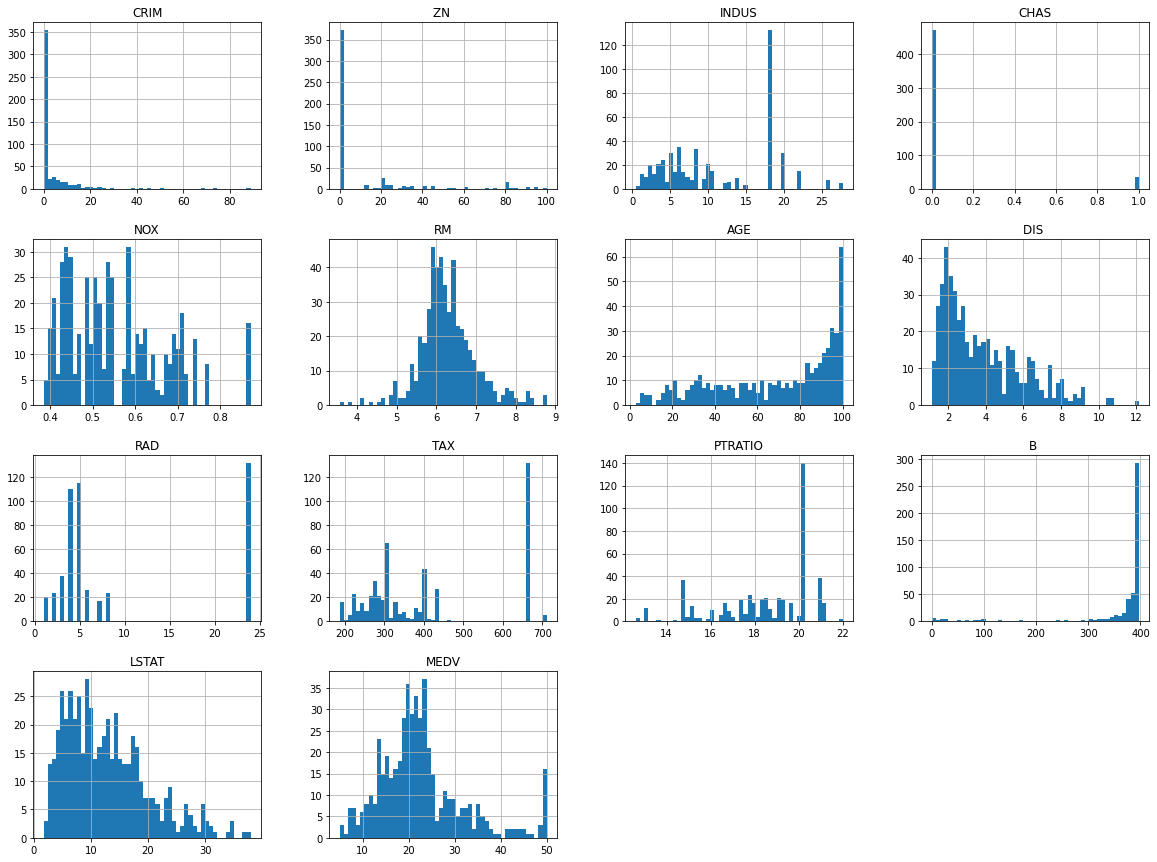

In [64]:
housing.hist( bins=50, figsize=(20,15))

Train Test Splitting

In [65]:
# def split_train_test(data, test_ratio):
#   np.random.seed(42)
#   shuffled = np.random.permutation(len(data))
#   #print(shuffled)
#   test_set_size = int(len(data)*test_ratio)
#   test_indices = shuffled[:test_set_size]
#   train_indices = shuffled[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices] 

In [66]:
# train_set, test_set = split_train_test(housing, 0.2)

In [67]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [68]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [69]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [70]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [71]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [72]:
housing = strat_train_set.copy() #1:53:30 in video

**Looking for Correlations**

In [73]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff604e98c10>,
      dtype=object)

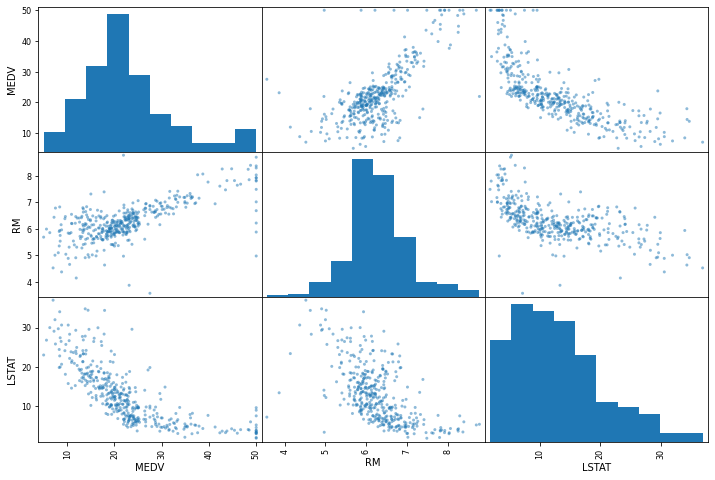

In [74]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

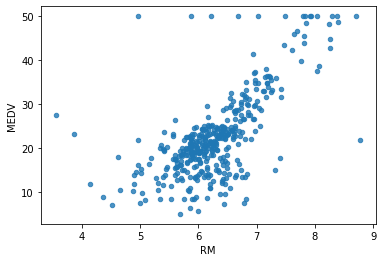

In [75]:
housing.plot(kind='scatter', x='RM', y= 'MEDV', alpha= 0.8)

##Trying out attribute combinations 

In [76]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [77]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

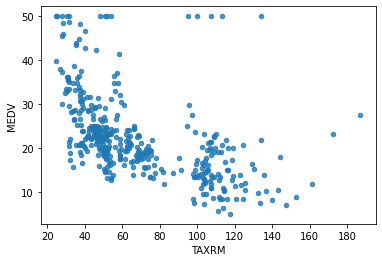

In [78]:
housing.plot(kind='scatter', x='TAXRM', y= 'MEDV', alpha= 0.8)

In [79]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()  #2:20:00

#test
housing_test = strat_test_set.drop("MEDV", axis=1)
housing_labels_test=strat_test_set["MEDV"].copy() 

##Missing Attributes

In [80]:
#Taking care of the missing data
# 1. Get rid of missing datappoints
# 2. getting rid of whole attribute
# 3. Set value to Mean, Median or 0

In [81]:
#Option 1
a = housing.dropna(subset=["RM"])
a.shape
#Original dataframe remains unchanged 

(399, 13)

In [82]:
# Option 2
housing.drop("RM", axis=1)
#Original dataframe remains unchanged 

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [83]:
# Option 3
median = housing["RM"].median()
housing["RM"].fillna(median)
#Original dataframe remains unchanged 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [84]:
housing.shape

(404, 13)

In [85]:
#before we started imputer 
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [86]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [87]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [88]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns= housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


##Creating a Pipeline

In [89]:
from sklearn.pipeline import Pipeline
#feature scaling
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()) 
])

In [90]:
housing_num_tr = my_pipeline.fit_transform(housing)

#test
housing_num_tr_test = my_pipeline.fit_transform(housing_test)

In [91]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [92]:
housing_num_tr_test

array([[-0.35082247, -0.49148409, -1.25183452, ..., -1.08091535,
         0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, ...,  0.78926008,
         0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, ..., -0.42852857,
         0.40196786, -0.66968264],
       ...,
       [-0.34805722,  0.27583291, -0.69445654, ..., -0.68948328,
         0.40196786, -1.0146106 ],
       [-0.34631323, -0.49148409,  2.27971238, ...,  0.31084311,
         0.11809354,  0.32198523],
       [-0.3425412 , -0.49148409,  0.53177502, ..., -0.86345309,
         0.40196786,  0.86465206]])

## Selecting a desired model 

In [93]:
housing_num_tr.shape

(404, 13)

In [94]:
housing_num_tr_test.shape

(102, 13)

##Models

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [96]:
#random testing
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.911, 26.348, 14.855, 23.457, 23.235])

In [97]:
#actual data
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [98]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [99]:
rmse 

1.183216797589946

In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores) 

In [101]:
rmse_scores

array([2.80645596, 2.89023911, 4.24139086, 2.59576676, 3.58916409,
       2.87931408, 4.55675126, 3.39577218, 3.02981444, 3.38038234])

In [102]:
def print_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [103]:
print_scores(rmse_scores)

Scores:  [2.80645596 2.89023911 4.24139086 2.59576676 3.58916409 2.87931408
 4.55675126 3.39577218 3.02981444 3.38038234]
Mean:  3.336505107635257
Standard Deviation:  0.6090135302909901


In [104]:
#Test data
from sklearn.metrics import mean_squared_error
housing_predictions_test = model.predict(housing_num_tr_test)
mse = mean_squared_error(housing_labels_test, housing_predictions_test)
rmse = np.sqrt(mse)

In [105]:
rmse 

3.391685333571023

In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr_test, housing_labels_test, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores) 

In [107]:
rmse_scores

array([3.85058068, 4.06626359, 5.28370788, 5.04542022, 2.93348832,
       5.64543492, 4.96557845, 4.55263208, 2.987395  , 4.63613235])

In [108]:
def print_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [109]:
print_scores(rmse_scores)

Scores:  [3.85058068 4.06626359 5.28370788 5.04542022 2.93348832 5.64543492
 4.96557845 4.55263208 2.987395   4.63613235]
Mean:  4.396663348500472
Standard Deviation:  0.8778831750543518
